**FGV EPGE - Escola de Pós-graduação em Economia**
==
**Trabalho da Disciplina Deep Learning**
==
Professores: 


Monitora: Maria Gabriela Gontijo

**Tema: **
==
Alunos: Marlon Marques Almeida e Thamiris

Data: 21/01/2022

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
#from google.colab import drive 
#drive.mount('/content/drive')
np.random.seed(42)

In [7]:
import re # for regex
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
import pickle


In [8]:
#https://www.kaggle.com/muhammedabdulazeem/amazon-electronics-items-reviews

df2 = pd.read_csv(r"C:\Users\marlo\Downloads\amazonReview.csv")

In [9]:
#Importando do drive do Marlon
#https://www.kaggle.com/arhamrumi/amazon-product-reviews
df=pd.read_csv(r"C:\Users\marlo\Downloads\Reviews.csv")

In [10]:
df2.head()

,Reviewer name,title,Review body,Review rating,sentiment
0,Genuine buyer,Pros and cons,Great quality and the sound is actually great....,5.0 out of 5 stars,positive
1,CHETAN SHETTER,Never Expected in this price range... I Assure...,I've been using this from past 6 months. This ...,5.0 out of 5 stars,positive
2,Kiran Kumar M,"Bass bastler, Awesome HD quality sound, rockin...",Perfect bass and nice one. Superb sound and it...,5.0 out of 5 stars,positive
3,Raj Patel,Maybe buy boat basshead 100,Here is the review after 1 week of usePros:1.B...,4.0 out of 5 stars,positive
4,SANJAY KUMAR TIWARI,Superb head stereo better than leading brands.,Purchased after seeing review with suspicion t...,5.0 out of 5 stars,positive


In [11]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449779 entries, 0 to 449778
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Reviewer name  449774 non-null  object
 1   title          449723 non-null  object
 2   Review body    449715 non-null  object
 3   Review rating  411744 non-null  object
 4   sentiment      449779 non-null  object
dtypes: object(5)
memory usage: 17.2+ MB


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [14]:
df2.describe()

,Reviewer name,title,Review body,Review rating,sentiment
count,449774,449723,449715,411744,449779
unique,232431,189791,309670,5,2
top,Amazon Customer,Good,Good,5.0 out of 5 stars,positive
freq,31234,21917,13919,240739,383122


In [15]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


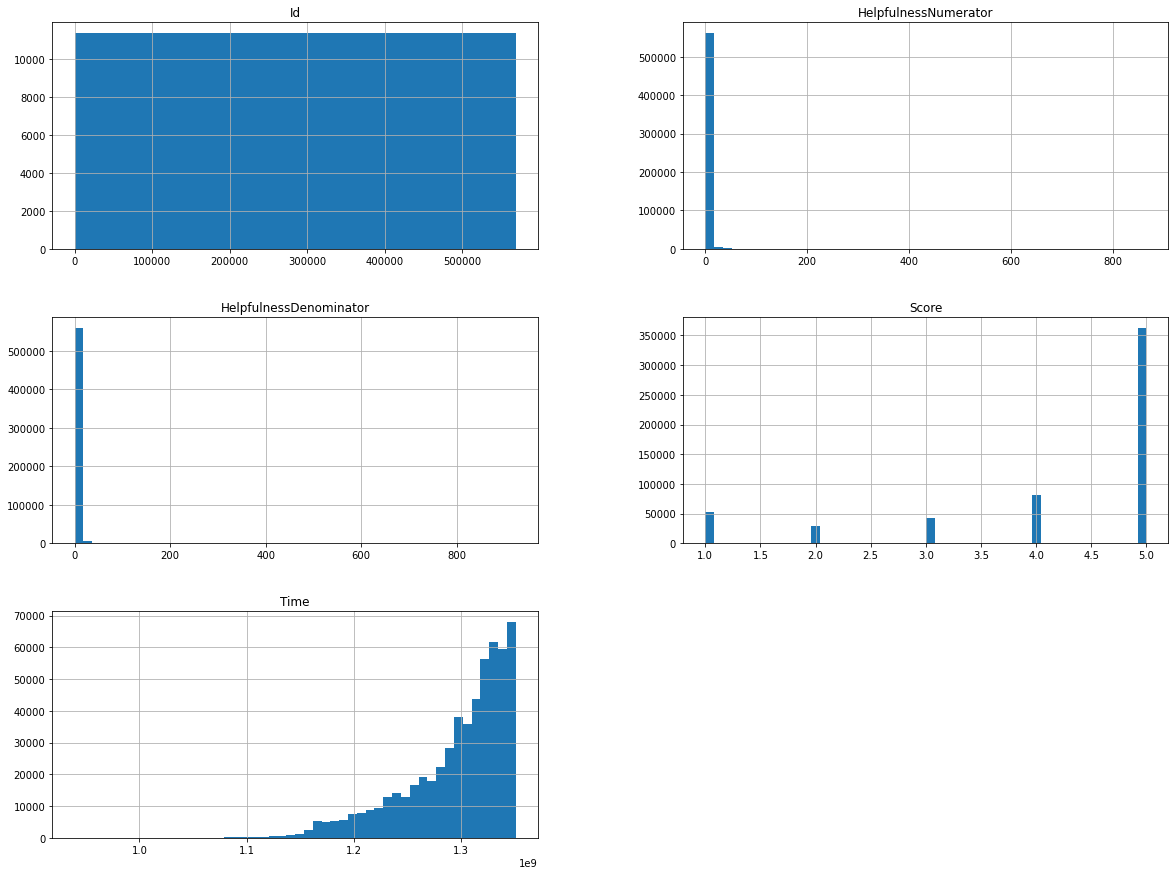

In [16]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [17]:
rating_prop = df["Score"].value_counts()/len(df)
rating_prop

5    0.638789
4    0.141885
1    0.091948
3    0.075010
2    0.052368
Name: Score, dtype: float64

In [18]:
sentiment_prop = df2["sentiment"].value_counts()/len(df2)
sentiment_prop

positive    0.851801
negative    0.148199
Name: sentiment, dtype: float64

In [19]:
df2["sentiment"].value_counts()

positive    383122
negative     66657
Name: sentiment, dtype: int64

In [20]:
print(df2['sentiment'].isna().sum())
print(df2['Review body'].isna().sum())



0
64


In [21]:
df2.drop(df2[df2['Review body'].isna()].index, inplace=True)
df2['Review body'].isna().sum()

0

In [22]:
df['Score'].isna().sum()

0

In [23]:
df3 = df2.reset_index()
df3.head()

,index,Reviewer name,title,Review body,Review rating,sentiment
0,0,Genuine buyer,Pros and cons,Great quality and the sound is actually great....,5.0 out of 5 stars,positive
1,1,CHETAN SHETTER,Never Expected in this price range... I Assure...,I've been using this from past 6 months. This ...,5.0 out of 5 stars,positive
2,2,Kiran Kumar M,"Bass bastler, Awesome HD quality sound, rockin...",Perfect bass and nice one. Superb sound and it...,5.0 out of 5 stars,positive
3,3,Raj Patel,Maybe buy boat basshead 100,Here is the review after 1 week of usePros:1.B...,4.0 out of 5 stars,positive
4,4,SANJAY KUMAR TIWARI,Superb head stereo better than leading brands.,Purchased after seeing review with suspicion t...,5.0 out of 5 stars,positive


In [24]:
df3 = df3.rename(columns={'Review body': 'review_body','Reviewer name':'reviewer_name','Review rating':'review_rating'})
df3

,index,reviewer_name,title,review_body,review_rating,sentiment
0,0,Genuine buyer,Pros and cons,Great quality and the sound is actually great....,5.0 out of 5 stars,positive
1,1,CHETAN SHETTER,Never Expected in this price range... I Assure...,I've been using this from past 6 months. This ...,5.0 out of 5 stars,positive
2,2,Kiran Kumar M,"Bass bastler, Awesome HD quality sound, rockin...",Perfect bass and nice one. Superb sound and it...,5.0 out of 5 stars,positive
3,3,Raj Patel,Maybe buy boat basshead 100,Here is the review after 1 week of usePros:1.B...,4.0 out of 5 stars,positive
4,4,SANJAY KUMAR TIWARI,Superb head stereo better than leading brands.,Purchased after seeing review with suspicion t...,5.0 out of 5 stars,positive
...,...,...,...,...,...,...
449710,449774,Dipchand,Not good,One side head phone is not working within 10 d...,1.0 out of 5 stars,negative
449711,449775,Amazon Customer,Need replacement,Quality is good. And there is some damage near...,1.0 out of 5 stars,negative
449712,449776,MAYANK MISHRA,Stopped working after 1 month.,Your browser does not support HTML5 video. Af...,3.0 out of 5 stars,negative
449713,449777,Zan,Cheap Quality.,This product is of very cheap quality. Wouldn'...,1.0 out of 5 stars,negative


1. Remove HTML tags

Regex rule : ‘<.*?>’

In [25]:
def clean(text):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',text)

df3.review_body = df3.review_body.apply(clean)
df3.review_body[48946]

'Sounds effect is good'

2. Remove special characters

In [26]:
def is_special(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem

df3.review_body = df3.review_body.apply(is_special)
df3.review_body[0]

'Great quality and the sound is actually great Pros1  hd sound quality is great it has micro woffers 2  built quality is great wires are thick 3  hd calling is great my voice was clearly audible to other person on the call Cons1  sometimes earbuds hurt the ears and they might not be comfortable to some people otherwise it s a great product'

3. Convert everything to lowercase

In [27]:
def to_lower(text):
    return text.lower()

df3.review_body = df3.review_body.apply(to_lower)
df3.review_body[0]

'great quality and the sound is actually great pros1  hd sound quality is great it has micro woffers 2  built quality is great wires are thick 3  hd calling is great my voice was clearly audible to other person on the call cons1  sometimes earbuds hurt the ears and they might not be comfortable to some people otherwise it s a great product'

4. Remove stopwords

In [28]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

df3.review_body = df3.review_body.apply(rem_stopwords)
df3.review_body[0]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marlo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marlo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['great',
 'quality',
 'sound',
 'actually',
 'great',
 'pros1',
 'hd',
 'sound',
 'quality',
 'great',
 'micro',
 'woffers',
 '2',
 'built',
 'quality',
 'great',
 'wires',
 'thick',
 '3',
 'hd',
 'calling',
 'great',
 'voice',
 'clearly',
 'audible',
 'person',
 'call',
 'cons1',
 'sometimes',
 'earbuds',
 'hurt',
 'ears',
 'might',
 'comfortable',
 'people',
 'otherwise',
 'great',
 'product']

5. Stem the words

In [29]:
def stem_txt(text):
    ss = SnowballStemmer('english') #tem portugues também
    return " ".join([ss.stem(w) for w in text])

df3.review_body = df3.review_body.apply(stem_txt)
df3.review_body[0]

'great qualiti sound actual great pros1 hd sound qualiti great micro woffer 2 built qualiti great wire thick 3 hd call great voic clear audibl person call cons1 sometim earbud hurt ear might comfort peopl otherwis great product'

In [30]:
df3.iloc[:,3].values

array(['great qualiti sound actual great pros1 hd sound qualiti great micro woffer 2 built qualiti great wire thick 3 hd call great voic clear audibl person call cons1 sometim earbud hurt ear might comfort peopl otherwis great product',
       'use past 6 month actual earphon search realli great experi spec earphon great micro woofer deliv great sound qualiti bass nois cancel upto mark earphon never slip ear allow deliv gread sound effect right earphon damag brother',
       'perfect bass nice one superb sound nois cancel simpli superb worthi',
       ...,
       'browser support html5 video 1 month use stop work updat review',
       'product cheap qualiti recommend',
       'bad luck buy within month went bad give sound low'], dtype=object)

In [31]:
todrop = ['sentiment']
df4 = df3.drop(todrop, axis=1)
df4.head()

,index,reviewer_name,title,review_body,review_rating
0,0,Genuine buyer,Pros and cons,great qualiti sound actual great pros1 hd soun...,5.0 out of 5 stars
1,1,CHETAN SHETTER,Never Expected in this price range... I Assure...,use past 6 month actual earphon search realli ...,5.0 out of 5 stars
2,2,Kiran Kumar M,"Bass bastler, Awesome HD quality sound, rockin...",perfect bass nice one superb sound nois cancel...,5.0 out of 5 stars
3,3,Raj Patel,Maybe buy boat basshead 100,review 1 week usepro 1 best build qualiti even...,4.0 out of 5 stars
4,4,SANJAY KUMAR TIWARI,Superb head stereo better than leading brands.,purchas see review suspicion may result stupid...,5.0 out of 5 stars


In [32]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_index, test_index in split.split(df3, df3['sentiment']):
    train_set = df3.loc[train_index]
    test_set = df3.loc[test_index]

In [33]:
print(f"Treino: {len(train_set)}\nTeste: {len(test_set)}")

Treino: 359772
Teste: 89943


In [34]:
sentiment_prop = df3.groupby('sentiment')['index'].count()/len(df3)
sentiment_prop

sentiment
negative    0.148214
positive    0.851786
Name: index, dtype: float64

In [35]:
train_setx

NameError: name 'train_setx' is not defined

In [36]:
#Excluindo da base de treino e teste atraibuto Credit Score Cat
train_setx = train_set.copy()
test_setx = test_set.copy()
xtrain = np.array(train_setx.drop('sentiment', axis=1, inplace=True))
xtest = np.array(test_setx.drop('sentiment', axis=1, inplace=True))

In [37]:
ytrain = np.array(train_set['sentiment'])
ytest=np.array(test_set['sentiment'])

In [38]:
Xtest_reg = np.array(test_setx.iloc[:,3].values)
Xtrain_reg = np.array(train_setx.iloc[:,3].values)
ytrain = np.array(train_set.sentiment.values)
ytest = np.array(test_set.sentiment.values)
cv = CountVectorizer(max_features = 1000)
Xtrain_reg = cv.fit_transform(train_setx.review_body).toarray()
Xtest_reg = cv.fit_transform(test_setx.review_body).toarray()
print("X.shape = ",Xtrain_reg.shape)
print("y.shape = ",ytrain.shape)
print("X.shape = ",Xtest_reg.shape)
print("y.shape = ",ytest.shape)

X.shape =  (359772, 1000)
y.shape =  (359772,)
X.shape =  (89943, 1000)
y.shape =  (89943,)


In [103]:
df3
dummy = pd.get_dummies(df3.sentiment)
dummy.reset_index()
df5 = pd.concat([df3, dummy], axis=1)
dummy
df5


,index,reviewer_name,title,review_body,review_rating,sentiment,negative,positive
0,0,Genuine buyer,Pros and cons,great qualiti sound actual great pros1 hd soun...,5.0 out of 5 stars,positive,0,1
1,1,CHETAN SHETTER,Never Expected in this price range... I Assure...,use past 6 month actual earphon search realli ...,5.0 out of 5 stars,positive,0,1
2,2,Kiran Kumar M,"Bass bastler, Awesome HD quality sound, rockin...",perfect bass nice one superb sound nois cancel...,5.0 out of 5 stars,positive,0,1
3,3,Raj Patel,Maybe buy boat basshead 100,review 1 week usepro 1 best build qualiti even...,4.0 out of 5 stars,positive,0,1
4,4,SANJAY KUMAR TIWARI,Superb head stereo better than leading brands.,purchas see review suspicion may result stupid...,5.0 out of 5 stars,positive,0,1
...,...,...,...,...,...,...,...,...
449710,449774,Dipchand,Not good,one side head phone work within 10 day product...,1.0 out of 5 stars,negative,1,0
449711,449775,Amazon Customer,Need replacement,qualiti good damag near mic happend week use n...,1.0 out of 5 stars,negative,1,0
449712,449776,MAYANK MISHRA,Stopped working after 1 month.,browser support html5 video 1 month use stop w...,3.0 out of 5 stars,negative,1,0
449713,449777,Zan,Cheap Quality.,product cheap qualiti recommend,1.0 out of 5 stars,negative,1,0


In [105]:
df5.drop('sentiment', axis=1, inplace=True)
df5.head()

,index,reviewer_name,title,review_body,review_rating,negative,positive
0,0,Genuine buyer,Pros and cons,great qualiti sound actual great pros1 hd soun...,5.0 out of 5 stars,0,1
1,1,CHETAN SHETTER,Never Expected in this price range... I Assure...,use past 6 month actual earphon search realli ...,5.0 out of 5 stars,0,1
2,2,Kiran Kumar M,"Bass bastler, Awesome HD quality sound, rockin...",perfect bass nice one superb sound nois cancel...,5.0 out of 5 stars,0,1
3,3,Raj Patel,Maybe buy boat basshead 100,review 1 week usepro 1 best build qualiti even...,4.0 out of 5 stars,0,1
4,4,SANJAY KUMAR TIWARI,Superb head stereo better than leading brands.,purchas see review suspicion may result stupid...,5.0 out of 5 stars,0,1


In [109]:
from sklearn.model_selection import StratifiedShuffleSplit

split2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_index_2, test_index_2 in split2.split(df5, df5['negative']):
    train_set_2 = df5.loc[train_index]
    test_set_2 = df5.loc[test_index]

In [110]:
sentiment_prop_2 = df5.groupby('negative')['index'].count()/len(df5)
sentiment_prop_2

negative
0    0.851786
1    0.148214
Name: index, dtype: float64

In [111]:
#Excluindo da base de treino e teste atraibuto Credit Score Cat
train_setx_2 = train_set_2.copy()
test_setx_2 = test_set_2.copy()
xtrain_2 = np.array(train_setx_2.drop('negative', axis=1, inplace=True))
xtest_2 = np.array(test_setx_2.drop('negative', axis=1, inplace=True))

In [113]:
ytrain_2 = np.array(train_set_2['negative'])
ytest_2 =np.array(test_set_2['negative'])

In [114]:
Xtest_reg_2 = np.array(test_setx_2.iloc[:,3].values)
Xtrain_reg_2 = np.array(train_setx_2.iloc[:,3].values)
ytrain_2 = np.array(train_set_2.negative.values)
ytest_2 = np.array(test_set_2.negative.values)
cv = CountVectorizer(max_features = 1000)
Xtrain_reg_2 = cv.fit_transform(train_setx_2.review_body).toarray()
Xtest_reg_2 = cv.fit_transform(test_setx_2.review_body).toarray()
print("X.shape = ",Xtrain_reg.shape)
print("y.shape = ",ytrain.shape)
print("X.shape = ",Xtest_reg.shape)
print("y.shape = ",ytest.shape)

X.shape =  (359772, 1000)
y.shape =  (359772,)
X.shape =  (89943, 1000)
y.shape =  (89943,)


3. Defining the models and Training them

In [123]:
gnb2,mnb2,bnb2 = GaussianNB(),MultinomialNB(alpha=1.0,fit_prior=True),BernoulliNB(alpha=1.0,fit_prior=True)
gnb2.fit(Xtrain_reg_2,ytrain_2)
mnb2.fit(Xtrain_reg_2,ytrain_2)
bnb2.fit(Xtrain_reg_2,ytrain_2)

BernoulliNB()

In [39]:
gnb,mnb,bnb = GaussianNB(),MultinomialNB(alpha=1.0,fit_prior=True),BernoulliNB(alpha=1.0,fit_prior=True)
gnb.fit(Xtrain_reg,ytrain)
mnb.fit(Xtrain_reg,ytrain)
bnb.fit(Xtrain_reg,ytrain)

BernoulliNB()

In [116]:
ypg = gnb.predict(Xtrain_reg)
ypm = mnb.predict(Xtrain_reg)
ypb = bnb.predict(Xtrain_reg)

KeyboardInterrupt: 

In [117]:
ypg2 = gnb2.predict(Xtrain_reg_2)
ypm2 = mnb2.predict(Xtrain_reg_2)
ypb2 = bnb2.predict(Xtrain_reg_2)

In [41]:
print("Gaussian = ",accuracy_score(ytrain,ypg))
print("Multinomial = ",accuracy_score(ytrain,ypm))
print("Bernoulli = ",accuracy_score(ytrain,ypb))

Gaussian =  0.8115751086799418
Multinomial =  0.8937716109091314
Bernoulli =  0.8598112137687202


In [118]:
print("Gaussian = ",accuracy_score(ytrain_2,ypg2))
print("Multinomial = ",accuracy_score(ytrain_2,ypm2))
print("Bernoulli = ",accuracy_score(ytrain_2,ypb2))

Gaussian =  0.8108357515315255
Multinomial =  0.8941774234793147
Bernoulli =  0.8600391358971793


In [42]:
ypg_test = gnb.predict(Xtest_reg)
ypm_test = mnb.predict(Xtest_reg)
ypb_test = bnb.predict(Xtest_reg)

In [124]:
ypg_test2 = gnb2.predict(Xtest_reg_2)
ypm_test2 = mnb2.predict(Xtest_reg_2)
ypb_test2 = bnb2.predict(Xtest_reg_2)

In [43]:
print("Gaussian = ",accuracy_score(ytest,ypg_test))
print("Multinomial = ",accuracy_score(ytest,ypm_test))
print("Bernoulli = ",accuracy_score(ytest,ypb_test))

Gaussian =  0.6828769331687847
Multinomial =  0.807255706391826
Bernoulli =  0.7920905462348377


In [125]:
print("Gaussian = ",accuracy_score(ytest_2,ypg_test2))
print("Multinomial = ",accuracy_score(ytest_2,ypm_test2))
print("Bernoulli = ",accuracy_score(ytest_2,ypb_test2))

Gaussian =  0.5734854296610076
Multinomial =  0.7621604794147404
Bernoulli =  0.7817061916991873


In [44]:
pickle.dump(mnb2,open('model1.pkl','wb'))

In [126]:
rev =  """Terrible. Complete trash. Brainless tripe. Insulting to anyone who isn't an 8 year old fan boy. Im actually pretty disgusted that this movie is making the money it is - what does it say about the people who brainlessly hand over the hard earned cash to be 'entertained' in this fashion and then come here to leave a positive 8.8 review?? Oh yes, they are morons. Its the only sensible conclusion to draw. How anyone can rate this movie amongst the pantheon of great titles is beyond me.

So trying to find something constructive to say about this title is hard...I enjoyed Iron Man? Tony Stark is an inspirational character in his own movies but here he is a pale shadow of that...About the only 'hook' this movie had into me was wondering when and if Iron Man would knock Captain America out...Oh how I wished he had :( What were these other characters anyways? Useless, bickering idiots who really couldn't organise happy times in a brewery. The film was a chaotic mish mash of action elements and failed 'set pieces'...

I found the villain to be quite amusing.

And now I give up. This movie is not robbing any more of my time but I felt I ought to contribute to restoring the obvious fake rating and reviews this movie has been getting on IMDb."""
f1 = clean(rev)
f2 = is_special(f1)
f3 = to_lower(f2)
f4 = rem_stopwords(f3)
f5 = stem_txt(f4)

bow,words = [],word_tokenize(f5)
for word in words:
    bow.append(words.count(word))

word_dict = cv.vocabulary_
pickle.dump(word_dict,open('model1.pkl','wb'))

inp = []
for i in word_dict:
    inp.append(f5.count(i[0]))
y_pred = mnb2.predict(np.array(inp).reshape(1,1000))

In [127]:
y_pred

array([0], dtype=uint8)

In [128]:
rev2 =  """Best product I could have bought in my life. Undoubtedly, this product is incredible, I have no words to express my joy and satisfaction of having bought from this store. 
I was looking for a complete product and no doubt I found. If someone really looks for quality,that really is the product they should buy. 
The manufacturer was amazing,seller quickly responded all requests, you should buy this product. When I bought the product, I sent a request to the color exchange seller, he immediately made the exchange, showing attention to me and quickly. 
I also thank the company's affection with after sales, no doubt this was my best purchase this year"""
f11 = clean(rev2)
f22 = is_special(f11)
f33 = to_lower(f22)
f44 = rem_stopwords(f33)
f55 = stem_txt(f44)

bow,words = [],word_tokenize(f55)
for word in words:
    bow.append(words.count(word))

word_dict = cv.vocabulary_
pickle.dump(word_dict,open('model1.pkl','wb'))

inp2 = []
for i in word_dict:
    inp2.append(f55.count(i[0]))
y_pred2 = mnb2.predict(np.array(inp2).reshape(1,1000))


In [129]:
y_pred2

array([0], dtype=uint8)

In [130]:
# Setup plotting
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

In [132]:
model = keras.Sequential([layers.Dense(1024, activation='relu'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(1024, activation='relu'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(1024, activation='relu'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(1),
                         ])

model.compile(optimizer='adam', loss='mae',)

history = model.fit(Xtrain_reg_2, ytrain_2,
                    validation_data=(Xtest_reg_2, ytest_2),
                    batch_size=256,
                    epochs=10,
                    verbose=0,
                   )

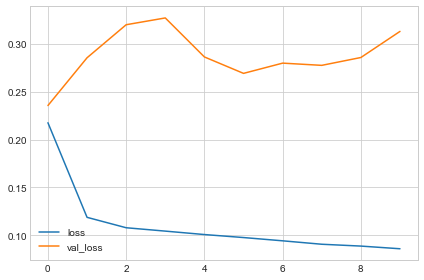

In [133]:
# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();